In [1]:
import tensorflow as tf

In [2]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training data:


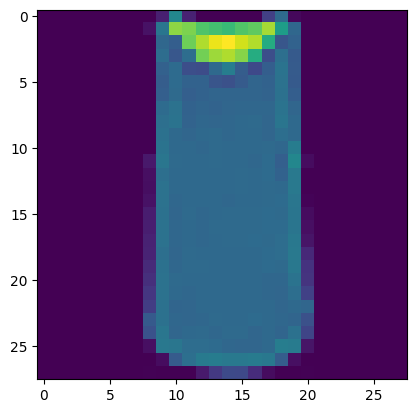

Label of this image is 8


In [3]:
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[2])
plt.show()
print("Label of this image is",ytrain[100])

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()

xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)


xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0


ytrain = keras.utils.to_categorical(ytrain, num_classes=10)
ytest = keras.utils.to_categorical(ytest, num_classes=10)


model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))


test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
print('Test accuracy:', test_acc)


predictions = model.predict(xtest)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 32ms/step - accuracy: 0.7186 - loss: 0.7855 - val_accuracy: 0.8299 - val_loss: 0.4632
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.8516 - loss: 0.4086 - val_accuracy: 0.8534 - val_loss: 0.4057
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8695 - loss: 0.3545 - val_accuracy: 0.8677 - val_loss: 0.3704
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.8841 - loss: 0.3141 - val_accuracy: 0.8773 - val_loss: 0.3385
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.8963 - loss: 0.2805 - val_accuracy: 0.8776 - val_loss: 0.3389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9040 - loss: 0.2596 - val_accuracy: 0.8734 - val_loss: 0.3449
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9112 - loss: 0.2466 - val_accuracy: 0.8917 - val_loss: 0.3075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9165 -

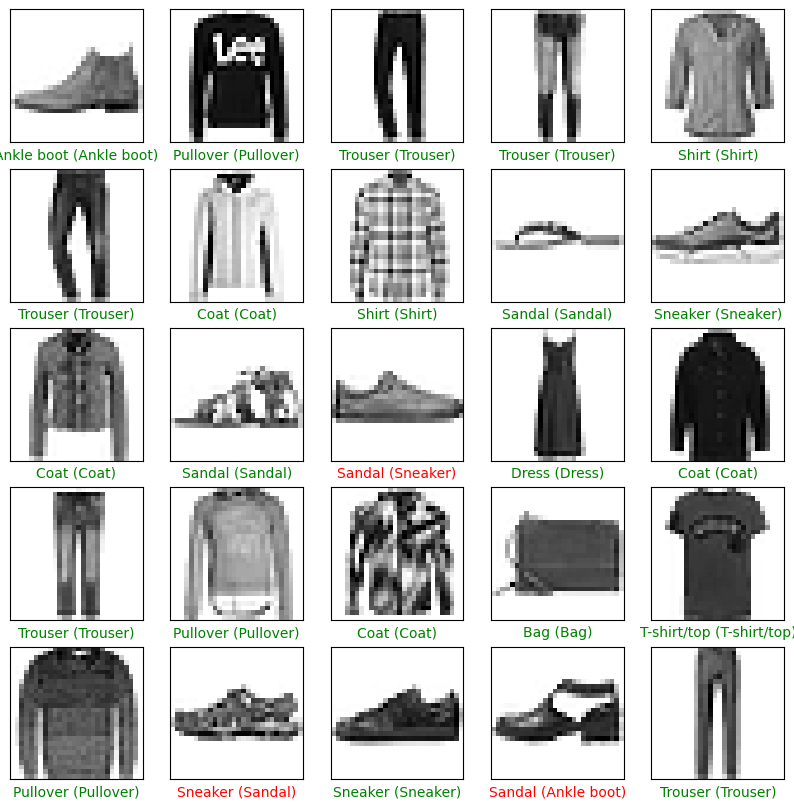

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(ytest[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.show()

In [6]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [7]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [8]:
!pip install kaggle

In [9]:
# Define kaggle_credentails as a dictionary containing your Kaggle credentials
kaggle_credentails = {
    "anujtadkase21": "your_username",  # Replace with your actual Kaggle username
    "1d35784a34cf26036e93706c0d869bbb": "your_key"  # Replace with your actual Kaggle key
}

# Now you can access the credentials:
KAGGLE_USERNAME = kaggle_credentails["anujtadkase21"]
KAGGLE_KEY = kaggle_credentails["1d35784a34cf26036e93706c0d869bbb"]

In [10]:
import kagglehub
abdallahalidev_plantvillage_dataset_path = kagglehub.dataset_download('abdallahalidev/plantvillage-dataset')

print('Data source import complete.')

Data source import complete.
